# Tutorial 2: Quantum Gates

##### After going through this 1 hour tutorial you will:

- be able to visualize quantum states on the Bloch sphere
- understand quantum gates on the Bloch sphere
- be able to use pyQuil to create shallow circuits
- understand pyQuil's wavefunction functionality
- know how to use quantum gate identities to simplify circuits

First we need to install [QuTiP](http://qutip.org/) which is a Python toolbox for quantum physicists. We will use it to plot quantum states on the Bloch sphere. If you haven't work with or heard of QuTiP yet then you should definitely check it out (not now though).

In [1]:
!pip install qutip

Next we need to make sure that we set up our API key & user ID in order to be able to use Rigetti's servers.

In [ ]:
import os

API_KEY = 'YOUR API KEY GOES HERE'
USER_ID = 'YOUR USER ID GOES HERE'

PYQUIL_CONFIG = f"""
[Rigetti Forest]
url: https://api.rigetti.com/qvm
key: {API_KEY}
user_id: {USER_ID}
"""

with open(os.path.expanduser('~/.pyquil_config'), 'w') as f:
    f.write(PYQUIL_CONFIG)

***
## 1. The Bloch sphere

In the [standard quantum computing literature](https://www.google.ca/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=0ahUKEwifzcXS743cAhXs6YMKHX9WCXkQFggqMAA&url=http%3A%2F%2Fwww-reynal.ensea.fr%2Fdocs%2Fiq%2FQC10th.pdf&usg=AOvVaw2C4NgLeXUf1P_DLxSk85_e) we usually write a single qubit as:

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\ket{\psi} = e^{i\gamma} \big( \, \alpha \ket{0} + \beta \ket{1}\,\big)$$

We know that the probability of measuring the $\ket{0}$ state is given by the absolute value of its amplitude squared:

$$|e^{i\gamma}\alpha|^2 = e^{i\gamma}\alpha e^{-i\gamma}\alpha^\dagger = e^{i\gamma - i\gamma} \alpha \alpha^\dagger = \alpha \alpha^\dagger$$

This leads to the important observation that the global phase of $e^{i\gamma}$ has no impact on the final probability and thus *global phases can always be ignored since they are immeasurable quantities*.

However, in order to visualize single-qubit states we need to express the qubit amplitudes in the following form:

$$\ket{\psi} = \cos(\frac{\theta}{2}) \ket{0} + e^{i\phi}\sin(\frac{\theta}{2}) \ket{1}$$
where
$$0 \leq \theta \leq \pi$$ and $$0 \leq \phi < 2\pi$$.

From this expression we can obtain the three Cartesian coordinates:

$$x = \sin(\theta)\cos(\phi)$$
$$y = \sin(\theta)\sin(\phi)$$
$$z = \cos(\theta)$$

which can be plotted on the three-dimensional unit 2-sphere, also called Bloch sphere which looks like this:

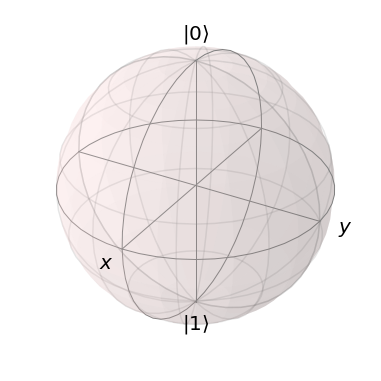

In [23]:
from qutip import Bloch

# Initialize an empty Bloch sphere
bloch_sphere = Bloch()
bloch_sphere.show()

#### Exercise 1.0: 
If you haven't worked with the Bloch sphere before, read about it briefly (!) on [Wikipedia](https://en.wikipedia.org/wiki/Bloch_sphere) and read page 15 in [Nielsen & Chuang](https://www.google.ca/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=0ahUKEwifzcXS743cAhXs6YMKHX9WCXkQFggqMAA&url=http%3A%2F%2Fwww-reynal.ensea.fr%2Fdocs%2Fiq%2FQC10th.pdf&usg=AOvVaw2C4NgLeXUf1P_DLxSk85_e). What does it mean if a quantum state vector lies on the equator of the sphere?

Here we define two useful functions related to the Bloch sphere that we will need later on. The first one eliminates the global phase and computes $x, y, z$ from $\alpha$ and $\beta$. The second function simply plots a given amplitude vector on the Bloch sphere using the QuTiP library. 

In [19]:
import cmath

def get_vector(alpha, beta):
    """
    Function to compute 3D Cartesian coordinates
    from 2D qubit vector.
    """

    # get phases
    angle_alpha = cmath.phase(alpha)
    angle_beta = cmath.phase(beta)

    if (angle_beta < 0 and angle_alpha < angle_beta) or (angle_beta > 0 and angle_alpha > angle_beta):
            denominator = cmath.exp(1j*angle_beta)
    else:
            denominator = cmath.exp(1j*angle_alpha)

    # eliminate global phase
    alpha_new = alpha/denominator
    beta_new = beta/denominator

    # special case to avoid division by zero
    if abs(alpha) == 0 or abs(beta) == 0:
        if alpha == 0:
            return [0,0,-1]
        else:
            return [0,0,1]
    else:
        # compute theta and phi from alpha and beta
        theta = 2*cmath.acos(alpha_new)
        phi = -1j*cmath.log(beta_new/cmath.sin(theta/2))

        # compute the Cartesian coordinates
        x = cmath.sin(theta)*cmath.cos(phi)
        y = cmath.sin(theta)*cmath.sin(phi)
        z = cmath.cos(theta)

    return [x.real,y.real,z.real]

def plot_quantum_state(sphere, amplitudes):
    """
    Thin function to abstract the plotting on the Bloch sphere.
    """
    bloch_sphere = Bloch()
    vec = get_vector(amplitudes[0], amplitudes[1])
    bloch_sphere.add_vectors(vec)
    bloch_sphere.show()
    bloch_sphere.clear()

***
## 2. pyQuil's wavefunction

Rigetti initializes all their qubits in the $\ket{0}$ state. Let's verify this by running a simple pyQuil program and visualizing the resulting quantum state on the Bloch sphere.

#### Exercise 2.0: 
Read the puQuil docs and learn how to obtain the wavefunction and its amplitudes to visualize the initial qubit state on the Bloch sphere.

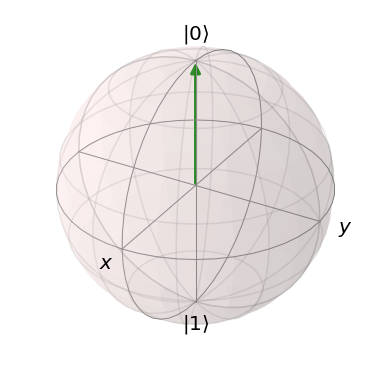

In [20]:
from pyquil.api import QVMConnection
from pyquil.quil import Program

# initialize a QVMConnection with Rigetti's server
qvm = QVMConnection()

# initialize a pyQuil program that measures the initial qubit state
p = Program()
p.measure(0, 0)

# TODO: find out how to get the resulting wavefunction + amplitudes after running the program in the QVM
wavefunction =
amplitudes =

# now we can call our custom function to plot the quantum state
plot_quantum_state(bloch_sphere, amplitudes)

pyQuil's Wavefunction has a lot of very helpful functionalities like obtaining probabilities from amplitudes, plotting as well as pretty printing them. 

#### Exercise 2.1:
Explore pyQuil's wavefunction functionalities. Try them out now!

In [24]:
# TODO: Try getting the probabilities from a wavefunction object and plot & pretty print the result!


***
## 3. Pauli gates on the Bloch sphere

#### Exercise 3.0:
Explore the action of the Pauli gates on the Bloch sphere.

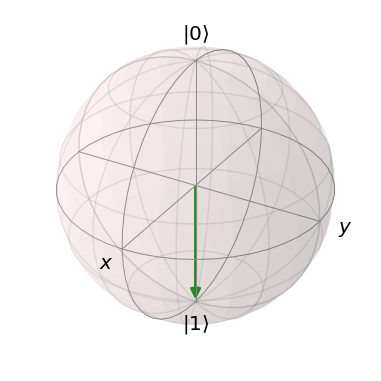

In [21]:
# TODO: import the Pauli gates (Identity, X, Y, Z).

p = Program()

# HINT: this is how we apply a X (NOT) gate to qubit 0:
p.inst(X(0))

# TODO: get amplitudes for plotting.
amplitudes = 

plot_quantum_state(bloch_sphere, amplitudes)

In the previous tutorial you've already familiarize yourself with another really important quantum gate: the Hadamard gate. In Dirac notation the H gate corresponds to the matrix given by:


$$H = \frac{1}{\sqrt{2}} \begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}$$

The Hadamard is an essential ingredient to create quantum superposition states. In the following exercises you will further explore it's use cases and intricacies.

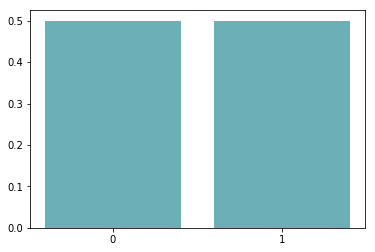

In [11]:
p = Program()
# apply the Hadamard gate to qubit 0 once

# TODO: get the wavefunction from the QVM 
# and plot the probability distribution

#### Exercise 3.1:
In three different experiments, apply the Hadamard gate three, four and five times in sequence and observe how the probability distribution changes! What do you observe?

In [ ]:
p = Program()
# TODO: apply the Hadamard gate to qubit 0 TWICE!

# TODO: get the wavefunction from the QVM 
# and plot the probability distribution

#### Exercise 3.2:
How would you describe the rotation of the Hadamard gate? Make sure to not just check how it acts on the 0 or 1 state!

In [ ]:
# Exercise: Try out T and S and their complex conjugates.

In [ ]:
# Introduce parametric gates + np.kron for multi-qubit gates

In [ ]:
# Show them different possibilities of chaining instructions

from pyquil.gates import MEASURE
print("Multiple inst arguments with final measurement:")
print(Program().inst(X(0), Y(1), Z(0)).measure(0, 1))

print("Chained inst with explicit MEASURE instruction:")
print(Program().inst(X(0)).inst(Y(1)).measure(0, 1).inst(MEASURE(1, 2)))

print("A mix of chained inst and measures:")
print(Program().inst(X(0)).measure(0, 1).inst(Y(1), X(0)).measure(0, 0))

print("A composition of two programs:")
print(Program(X(0)) + Program(Y(0)))

In [ ]:
# Exercise: Let them figure out how to pop instructions

In [ ]:
# Exercise: Implement custom single-qubit rotations with pyQuil!

In [ ]:
# Exercise: Can you rotate the Bloch vector to these specific locations?

In [ ]:
# Exercise: What rotation around which axes does the Hadamard gate result in?

In [10]:
# Manually simplifying circuit with gate identities
# TODO: Use Isaac Chuang's library to draw circuits!

In [ ]:
# Flipping CNOTs with Hadamards
# What if we are only allowed to do one-directional CNOTs?